# Summary

Part 1 of reinforcement learning programming assignment 1.

# Imports/Setup

In [1]:
import Misc.utils
import numpy as np
import matplotlib.pyplot as plt
import Misc.performance_logger
import Misc.evalutaions
from datetime import datetime
import os

In [2]:
env = utils.get_env()

/data/users/jupyter-dam724/.local/lib/python3.9/site-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


*Configuation data for experiments.*

In [3]:
class Config:
    nbins = 15
    
    current_time = datetime.now()
    time_string = current_time.strftime("%Y-%m-%d %H:%M:%S")
    direct = f'Runs/{time_string} RL1'

Make directory for all run data.

In [4]:
os.makedirs(Config.direct)

# Discretization

Use randomly sampled observations from the continous environment to choose a binning strategy.

In [5]:
observation_data = utils.get_state_distribution(env)

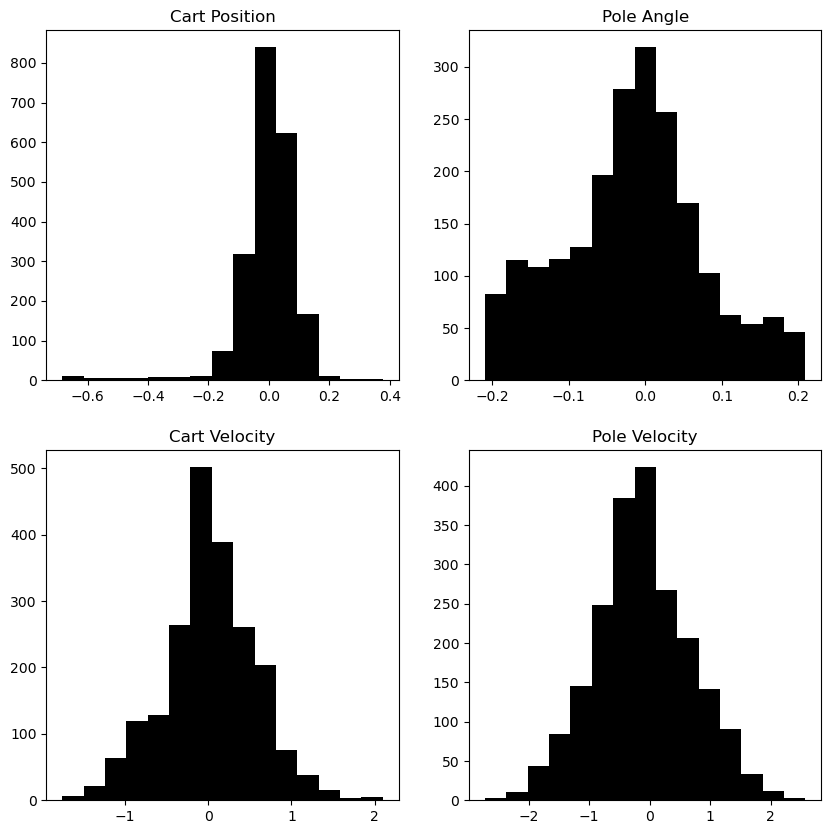

In [6]:
utils.plot_distribution(observation_data, Config.nbins, f'{Config.direct}/value_dist_truth.png')

In [7]:
bins = utils.get_bins_dynamic(observation_data, Config.nbins)

*Test discretization. Looks good.*

In [8]:
env.reset()
test_obs = utils.get_state_distribution(env)
binned_test_obv = utils.to_discrete(test_obs, bins)

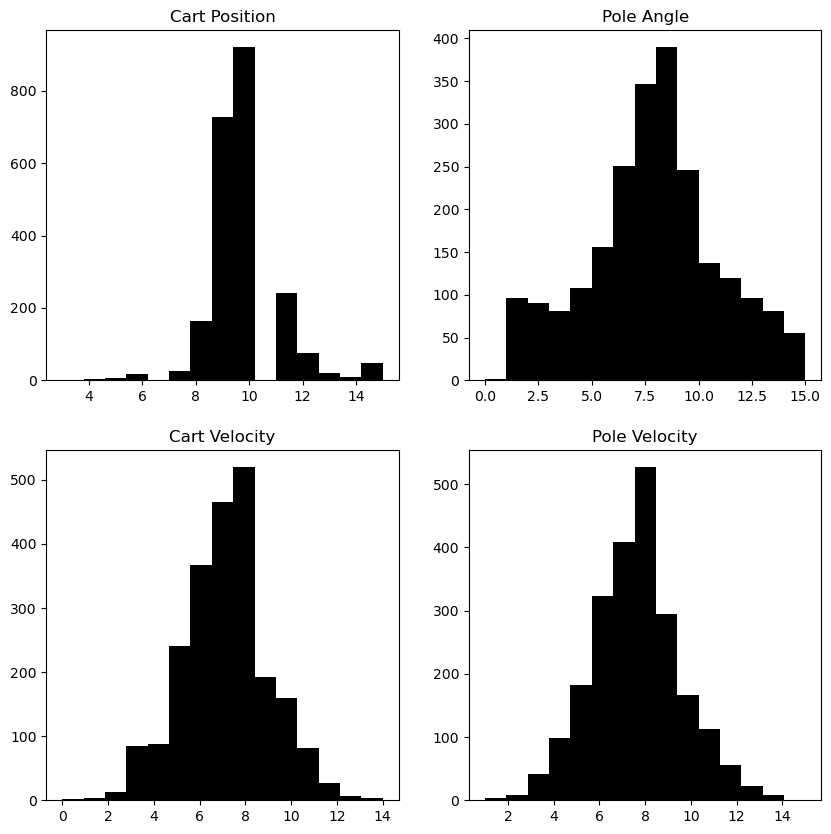

In [9]:
utils.plot_distribution(binned_test_obv, Config.nbins, f'{Config.direct}/value_dist_recon.png')

# Policy Iteration

Not completed.

In [2]:
# Unable to get this working. Since removed the code to make this notebook and codebase look better.

# Q-Learning

Agent using an "off-policy" and q-table.

In [3]:
from Agents.q_learning import QLearning

In [14]:
run_title = 'init'

epsilon = 0.5
decay = 0.99998
gamma = 1.0

episodes = 100000
logger = 1000

In [15]:
print(f'{epsilon} --> {epsilon * (decay ** (episodes/2))} --> {epsilon * (decay ** episodes)}')

0.5 --> 0.1839378811730029 --> 0.06766628826082746


*Setup logging structures.*

In [16]:
reward_log, time_log = np.zeros(episodes+1), np.zeros(episodes+1)

In [17]:
ql = QLearning(env.action_space.n, bins.shape, env, bins, gamma=gamma, epsilon=epsilon, epsilon_decay=decay)

In [18]:
ql_episode_rewards = ql.train(n_episodes=episodes, logger=logger, LOG_episodes=reward_log, LOG_time=time_log)

Episode 0, Average Reward: 10.00
Episode 1000, Average Reward: 36.29
Episode 2000, Average Reward: 51.34
Episode 3000, Average Reward: 56.90
Episode 4000, Average Reward: 61.68
Episode 5000, Average Reward: 66.13
Episode 6000, Average Reward: 68.54
Episode 7000, Average Reward: 77.27
Episode 8000, Average Reward: 78.25
Episode 9000, Average Reward: 85.46
Episode 10000, Average Reward: 88.20
Episode 11000, Average Reward: 88.23
Episode 12000, Average Reward: 95.54
Episode 13000, Average Reward: 99.43
Episode 14000, Average Reward: 106.30
Episode 15000, Average Reward: 104.24
Episode 16000, Average Reward: 115.39
Episode 17000, Average Reward: 118.15
Episode 18000, Average Reward: 118.87
Episode 19000, Average Reward: 125.14
Episode 20000, Average Reward: 126.75
Episode 21000, Average Reward: 129.14
Episode 22000, Average Reward: 134.27
Episode 23000, Average Reward: 140.46
Episode 24000, Average Reward: 152.12
Episode 25000, Average Reward: 150.73
Episode 26000, Average Reward: 155.70
E

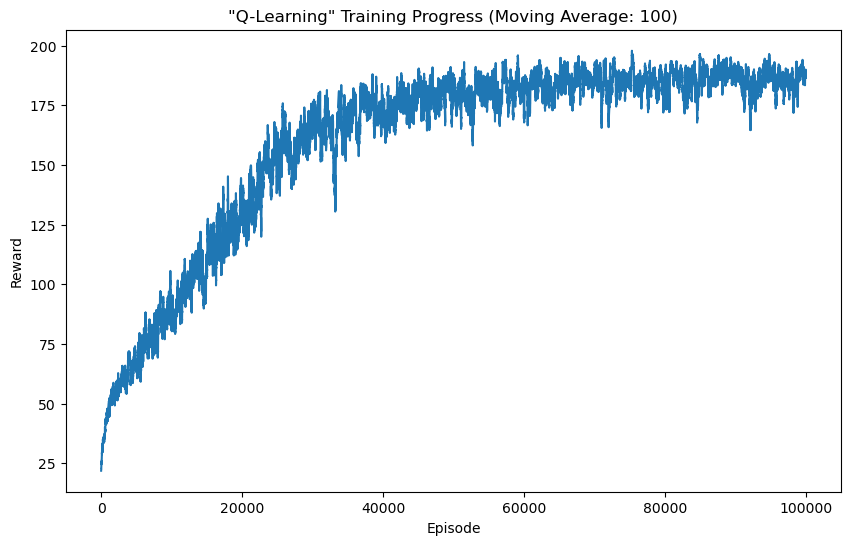

In [19]:
performance_logger.plot_training_progress(ql_episode_rewards, '"Q-Learning"', 100, f'{Config.direct}/{run_title}_qlearning_progress.png')

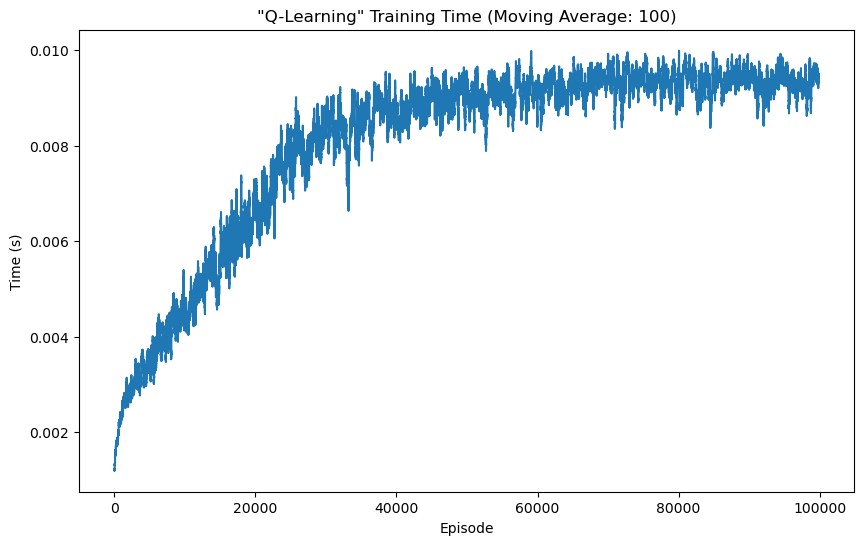

In [20]:
performance_logger.plot_time_progress(time_log, '"Q-Learning"', 100, f'{Config.direct}/{run_title}_qlearning_time.png')

In [23]:
dims = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

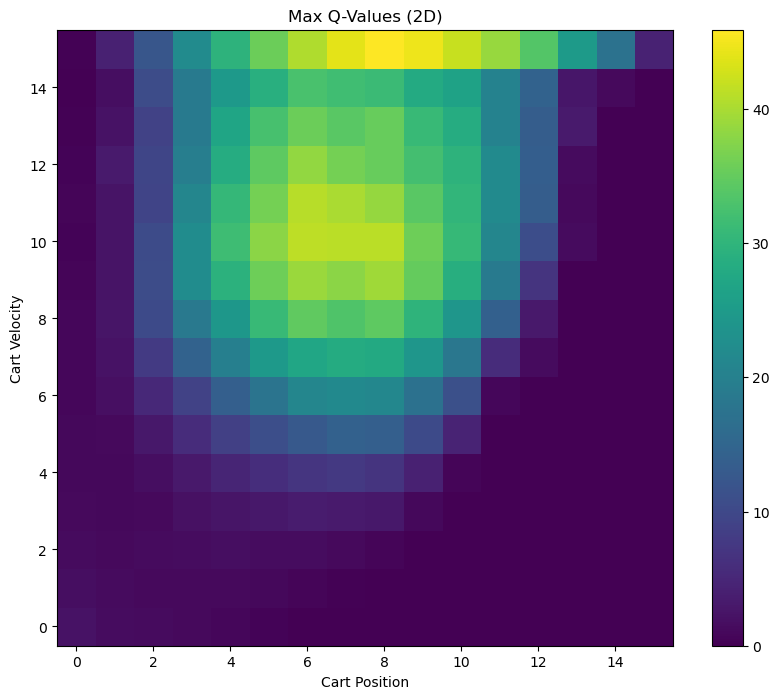

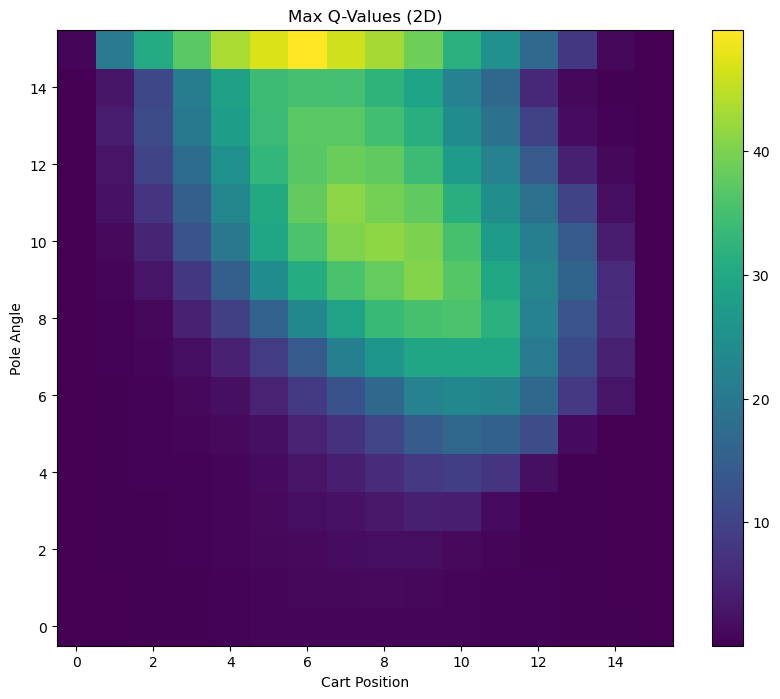

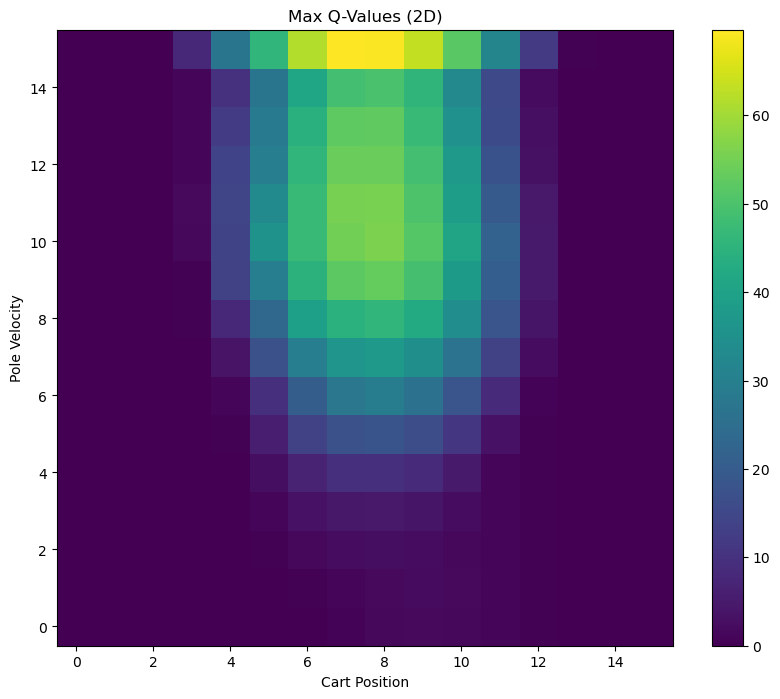

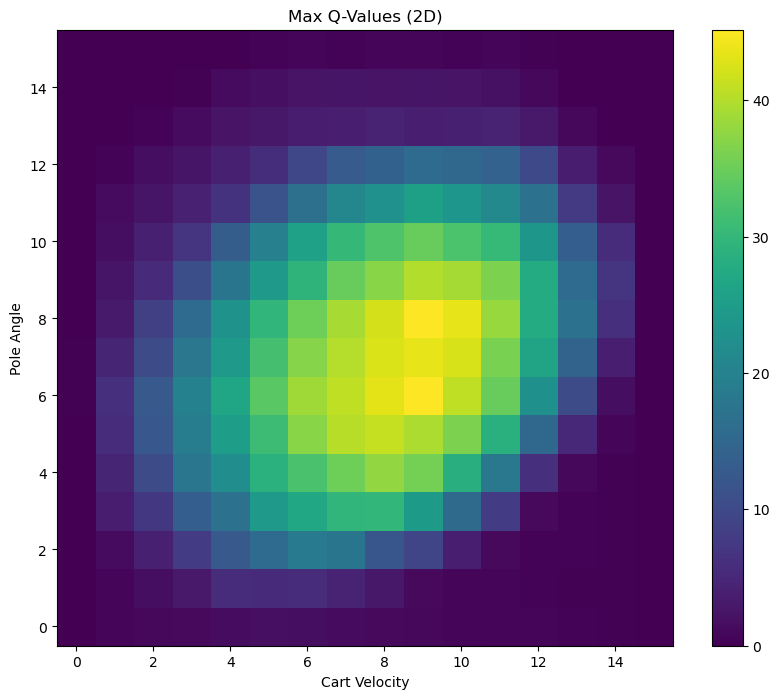

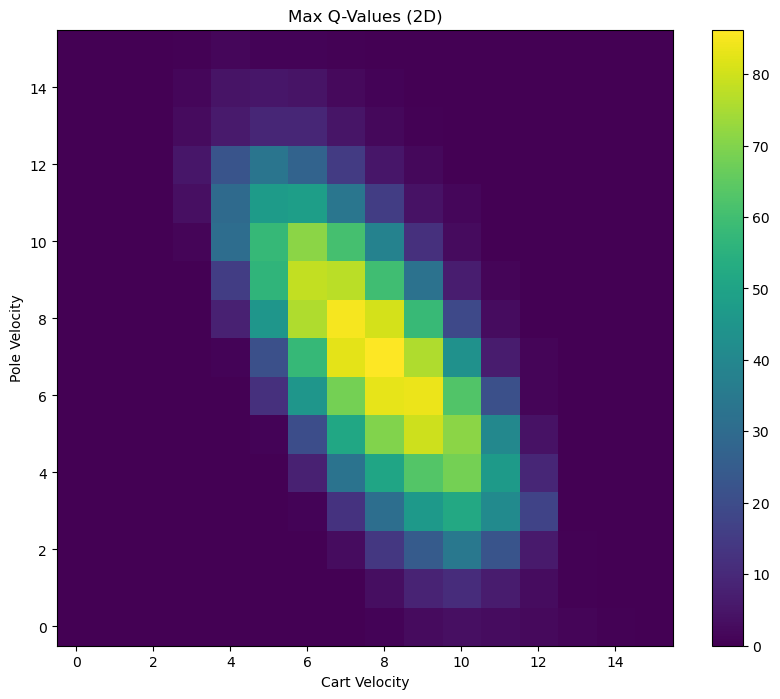

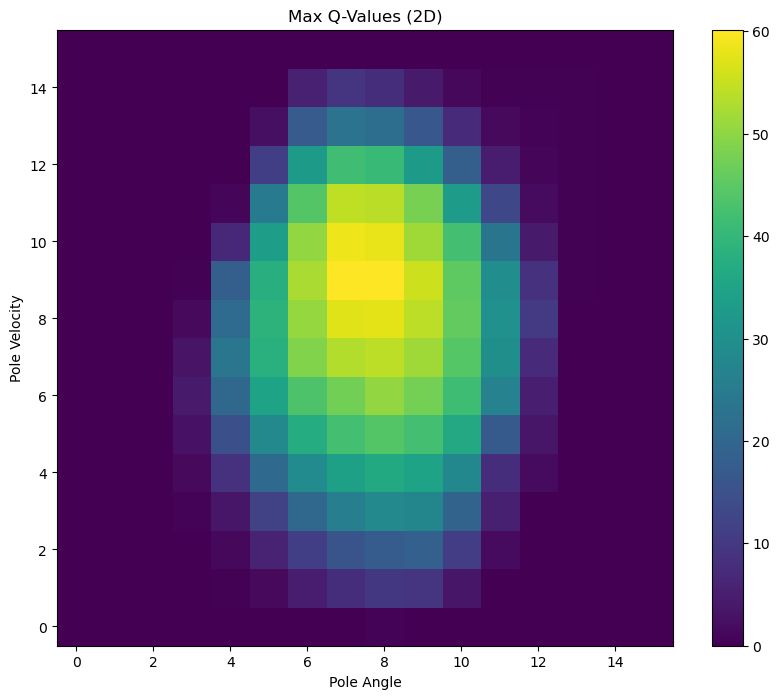

In [24]:
for dim1, dim2 in dims: 
    performance_logger.visualize_q_values_2D(ql.Q, dim1, dim2, f'{Config.direct}/{run_title}_qlearning_2D_values_{dim1}_{dim2}.png')

In [25]:
dims = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

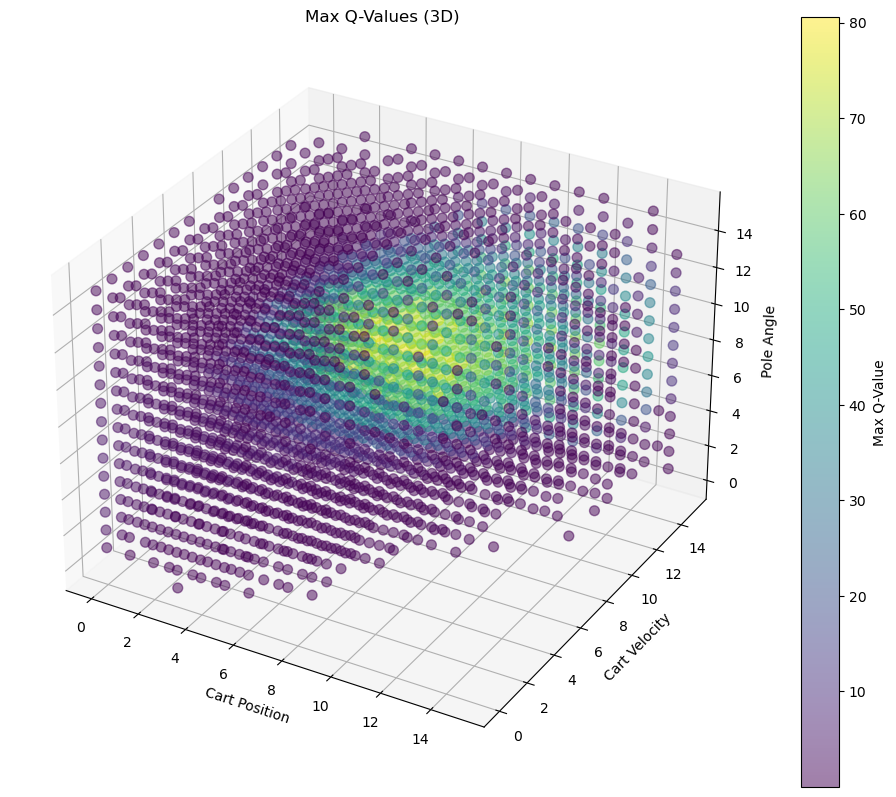

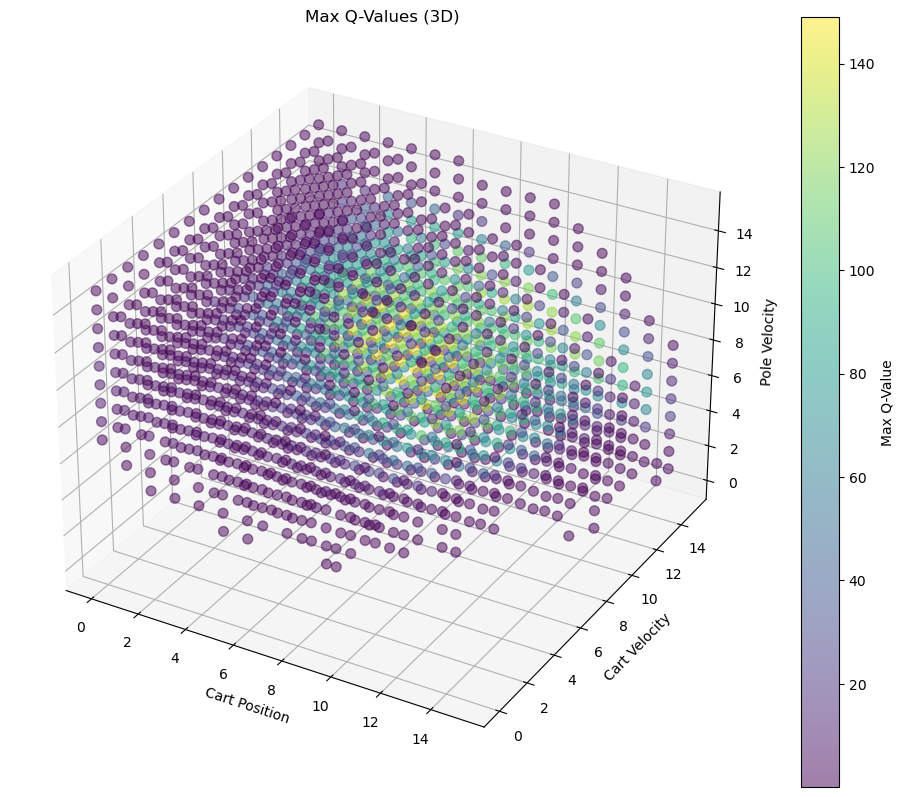

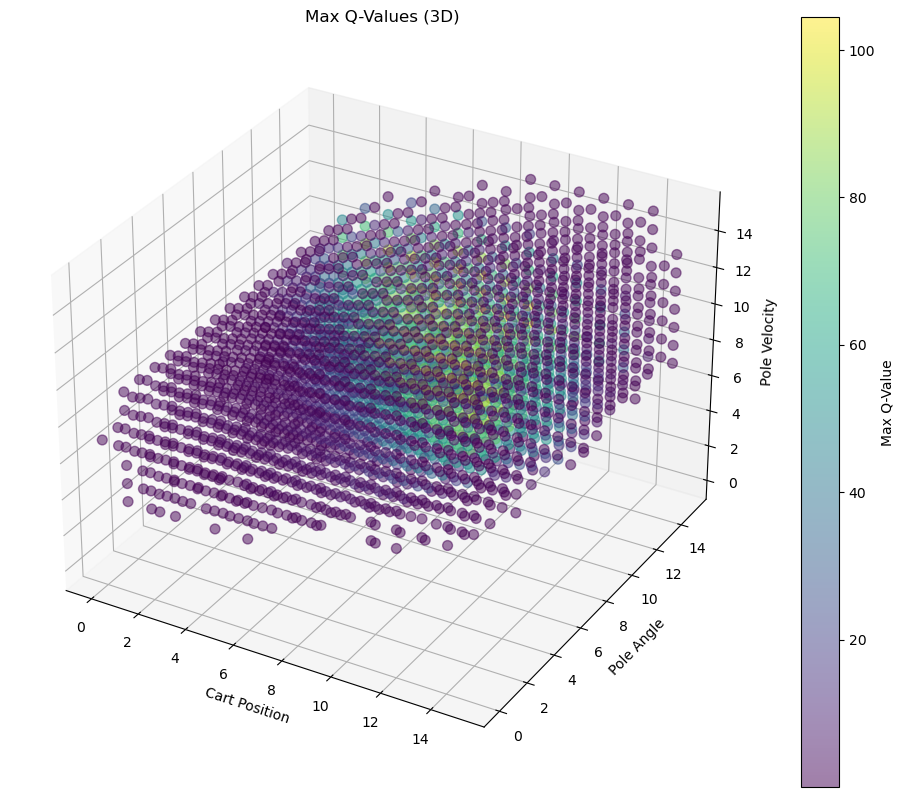

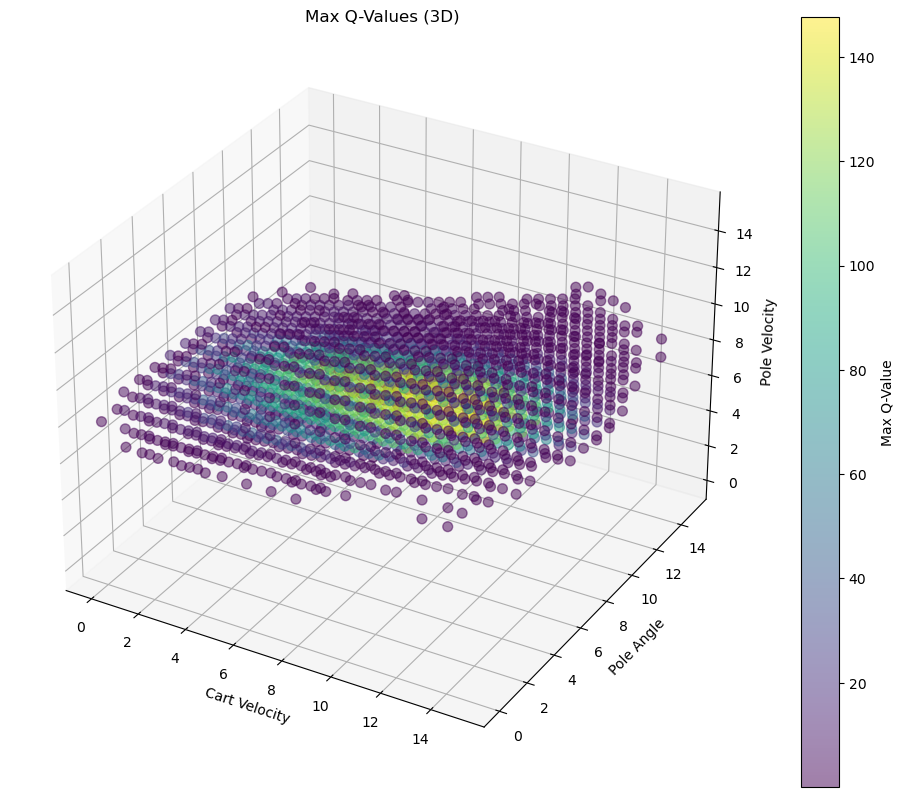

In [26]:
for dim1, dim2, dim3 in dims: 
    performance_logger.visualize_q_values_3D(ql.Q, dim1, dim2, dim3, f'{Config.direct}/{run_title}_qlearning_3D_values_{dim1}_{dim2}_{dim3}.png')

## Log Data

Log data that would be relevent for report. 

In [27]:
performance_logger.LOG[f'{run_title}_qlearning_reward'] = reward_log
performance_logger.LOG[f'{run_title}_qlearning_time'] = time_log
performance_logger.LOG[f'{run_title}_qlearning_Q'] = ql.Q

In [28]:
performance_logger.flush_LOG(f'{Config.direct}/LOG')

# SARSA

Agent using an "on-policy" and q-table.

In [4]:
from Agents.sarsa import Sarsa

In [30]:
run_title = 'init'

epsilon = 0.5
decay = 0.99998
gamma = 1.0

episodes = 100000
logger = 1000

In [31]:
print(f'{epsilon} --> {epsilon * (decay ** (episodes/2))} --> {epsilon * (decay ** episodes)}')

0.5 --> 0.1839378811730029 --> 0.06766628826082746


*Setup logging structures.*

In [32]:
reward_log, time_log = np.zeros(episodes+1), np.zeros(episodes+1)

In [33]:
sarsa = Sarsa(env.action_space.n, bins.shape, env, bins, epsilon=epsilon, epsilon_decay=decay)

In [34]:
sarsa_episode_rewards = sarsa.train(n_episodes=episodes, logger=logger, LOG_episodes=reward_log, LOG_time=time_log)

Episode 0, Average Reward: 10.00
Episode 1000, Average Reward: 23.93
Episode 2000, Average Reward: 36.45
Episode 3000, Average Reward: 46.99
Episode 4000, Average Reward: 50.71
Episode 5000, Average Reward: 54.18
Episode 6000, Average Reward: 58.46
Episode 7000, Average Reward: 60.11
Episode 8000, Average Reward: 65.77
Episode 9000, Average Reward: 68.93
Episode 10000, Average Reward: 70.55
Episode 11000, Average Reward: 74.76
Episode 12000, Average Reward: 73.80
Episode 13000, Average Reward: 76.94
Episode 14000, Average Reward: 79.06
Episode 15000, Average Reward: 85.45
Episode 16000, Average Reward: 91.42
Episode 17000, Average Reward: 89.53
Episode 18000, Average Reward: 95.32
Episode 19000, Average Reward: 96.57
Episode 20000, Average Reward: 97.50
Episode 21000, Average Reward: 102.49
Episode 22000, Average Reward: 102.02
Episode 23000, Average Reward: 101.94
Episode 24000, Average Reward: 109.15
Episode 25000, Average Reward: 105.73
Episode 26000, Average Reward: 103.94
Episode 

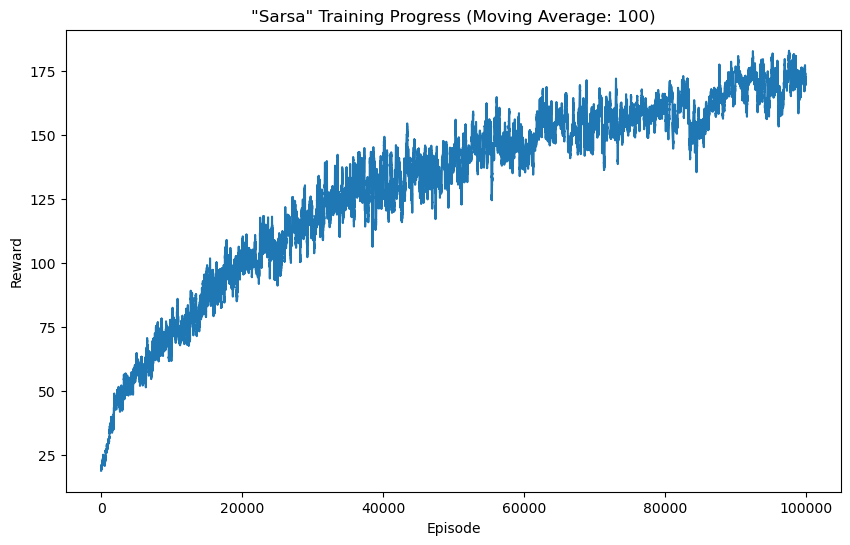

In [35]:
performance_logger.plot_training_progress(sarsa_episode_rewards, '"Sarsa"', 100, f'{Config.direct}/{run_title}_sarsa_progress.png')

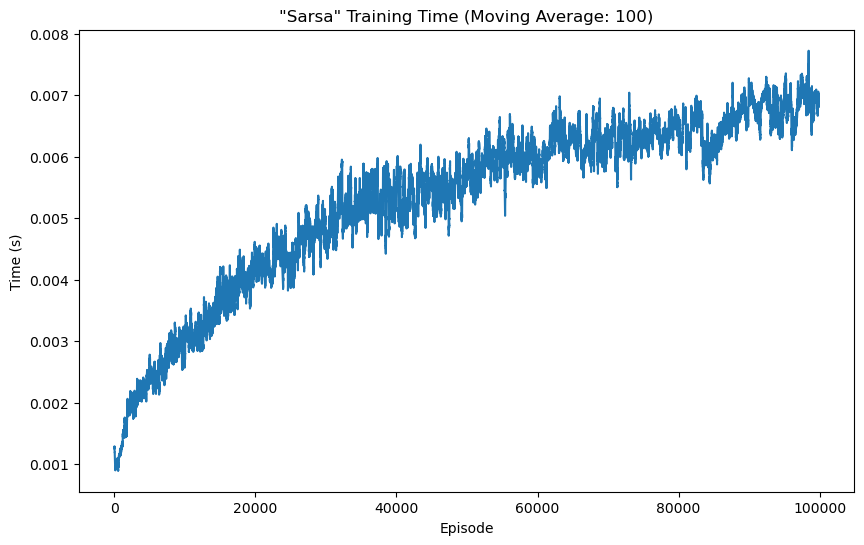

In [36]:
performance_logger.plot_time_progress(time_log, '"Sarsa"', 100, f'{Config.direct}/{run_title}_sarsa_time.png')

In [37]:
dims = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

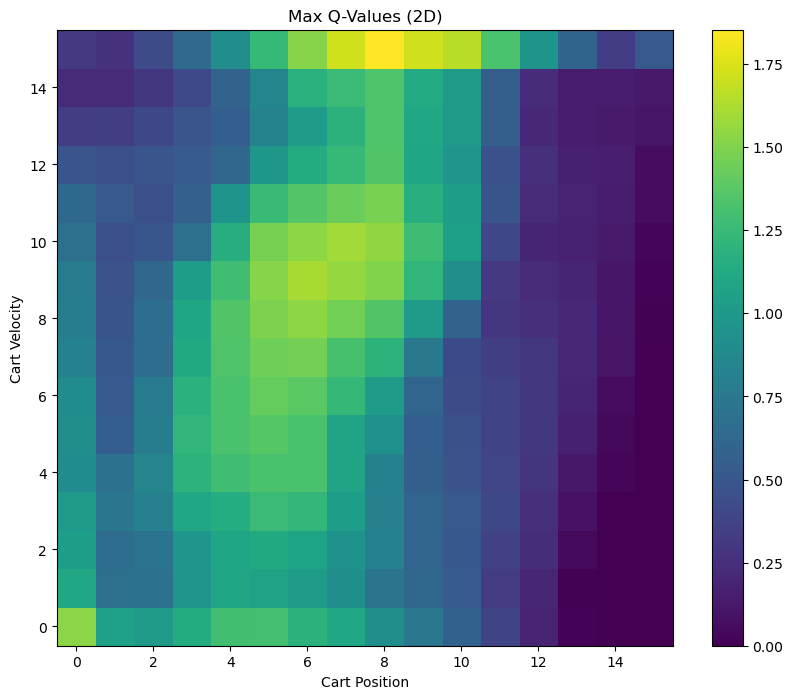

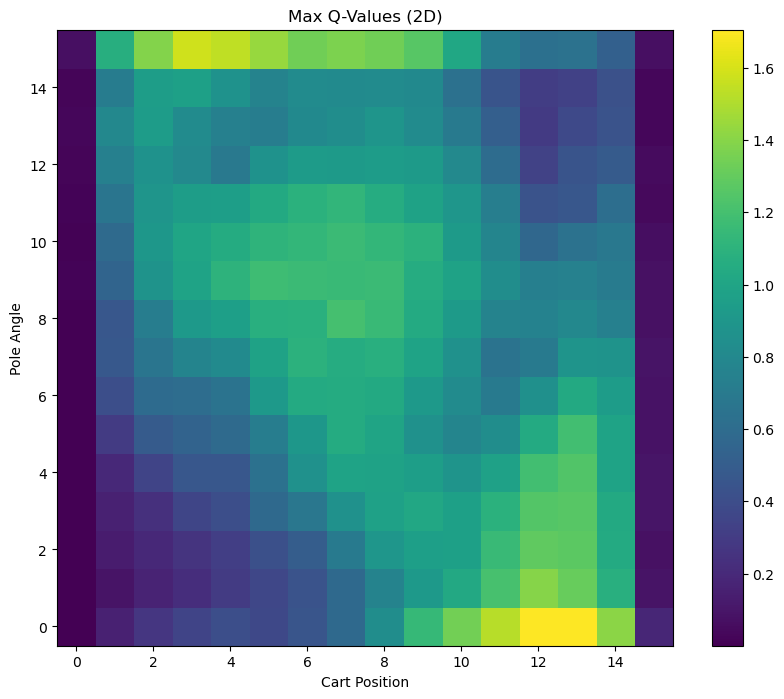

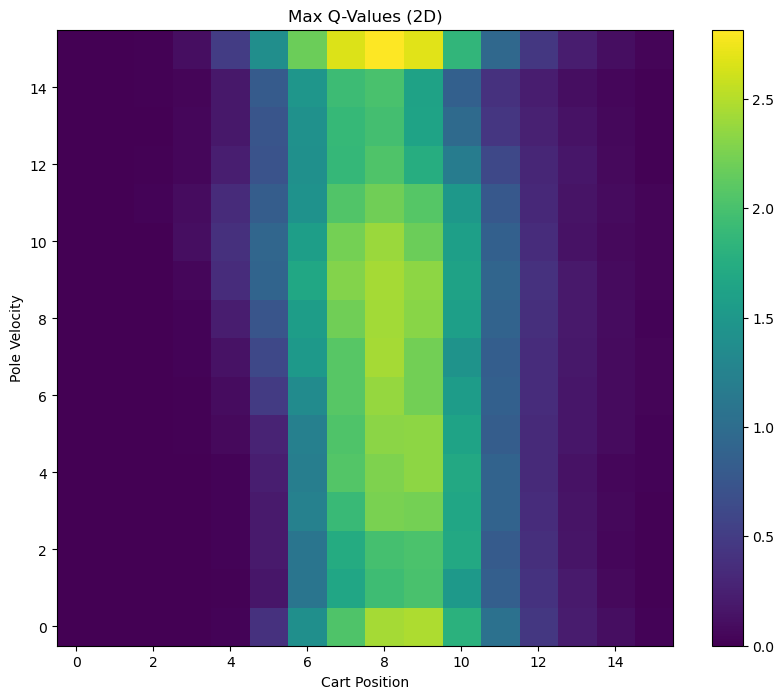

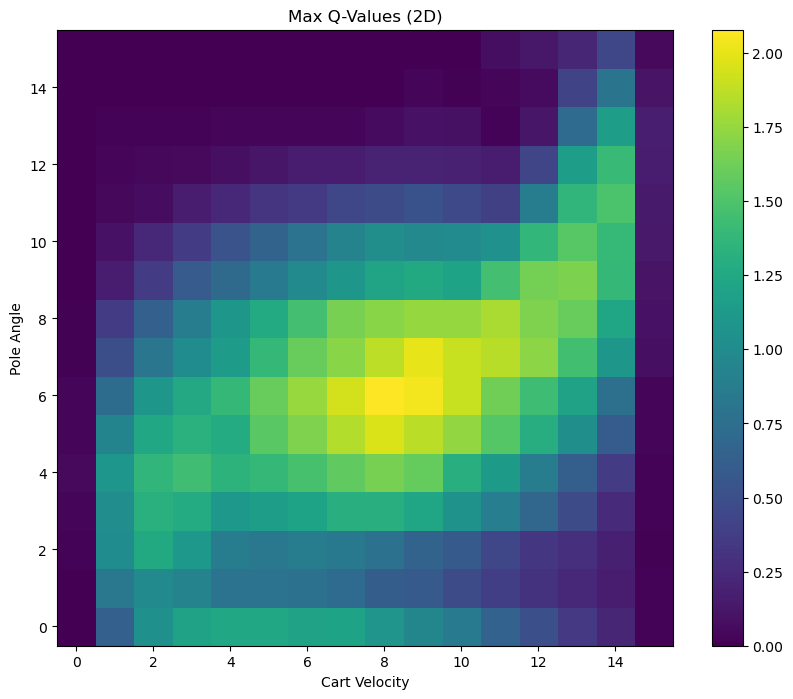

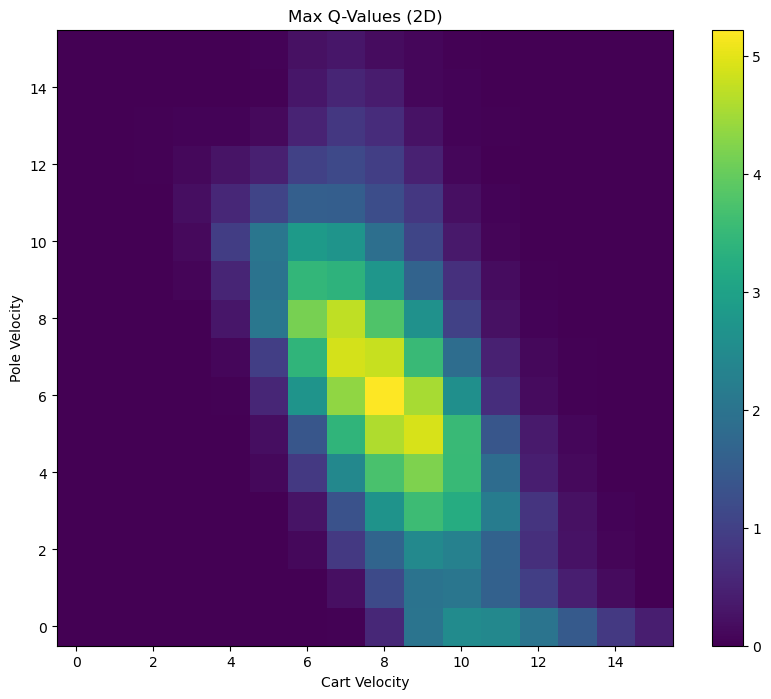

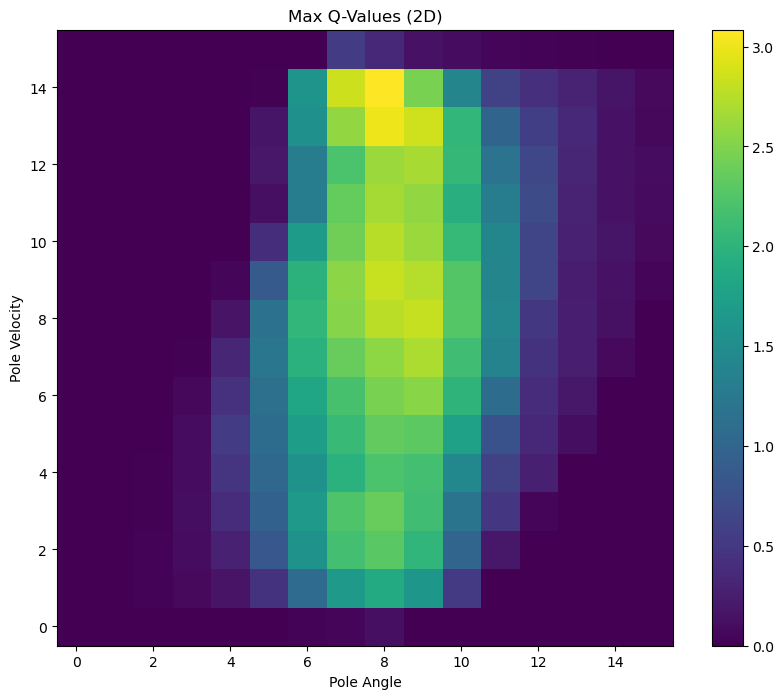

In [38]:
for dim1, dim2 in dims:
    performance_logger.visualize_q_values_2D(sarsa.Q, dim1, dim2, f'{Config.direct}/{run_title}_sarsa_2D_values_{dim1}_{dim2}.png')

In [39]:
dims = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

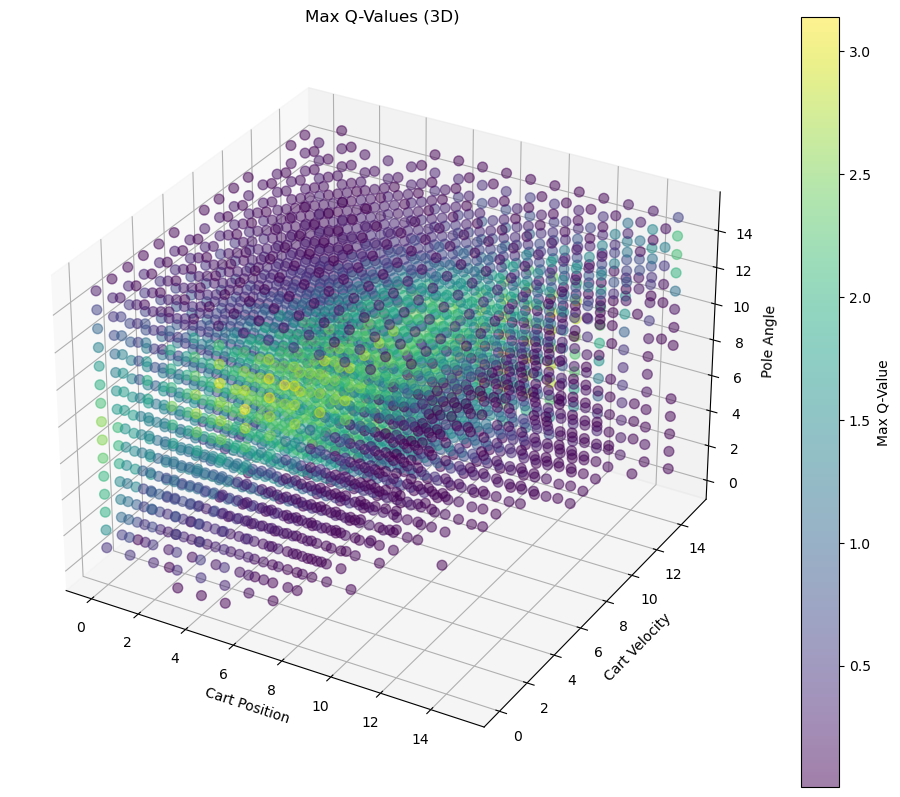

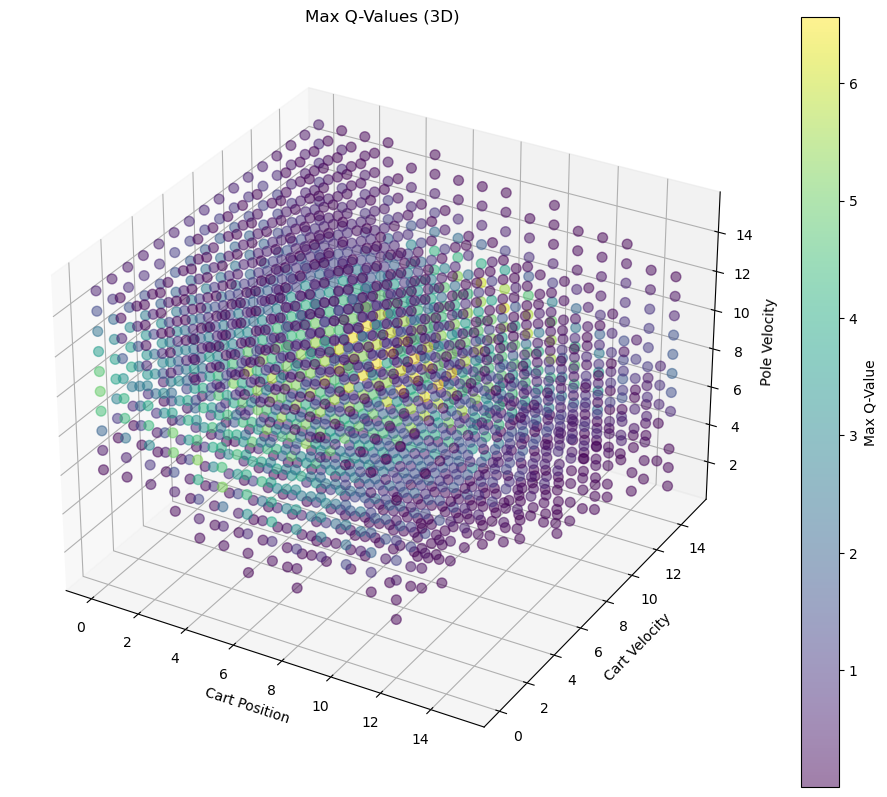

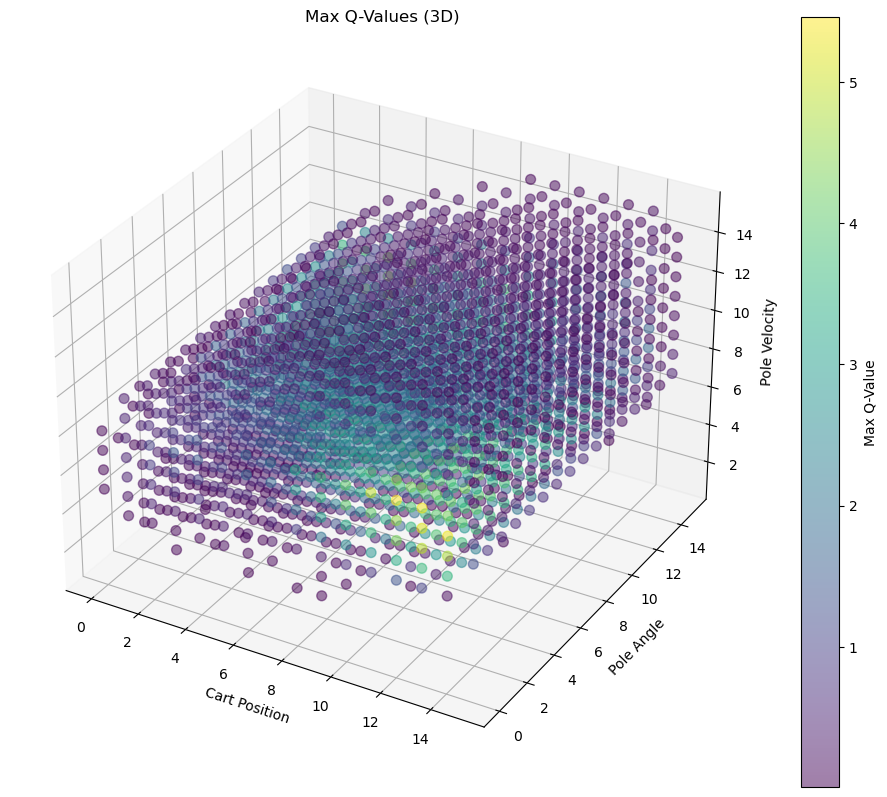

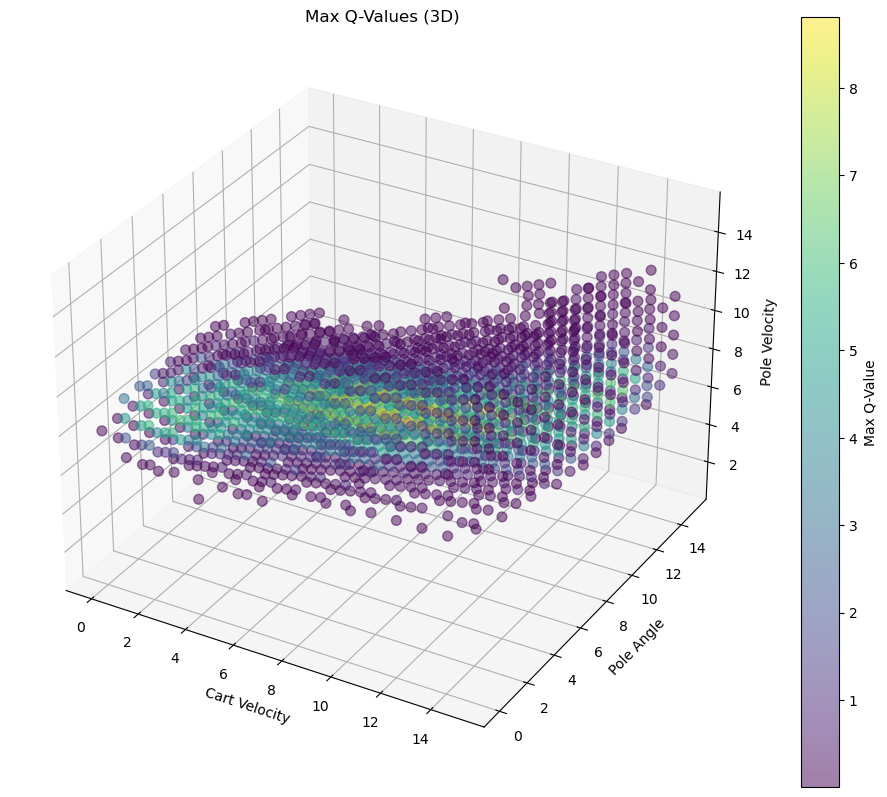

In [40]:
for dim1, dim2, dim3 in dims: 
    performance_logger.visualize_q_values_3D(sarsa.Q, dim1, dim2, dim3, f'{Config.direct}/{run_title}_sarsa_3D_values_{dim1}_{dim2}_{dim3}.png')

## Log Data

Log data that would be relevent for report. 

In [41]:
performance_logger.LOG[f'{run_title}_sarsa_reward'] = reward_log
performance_logger.LOG[f'{run_title}_sarsa_time'] = time_log
performance_logger.LOG[f'{run_title}_sarsa_Q'] = sarsa.Q

In [42]:
performance_logger.flush_LOG(f'{Config.direct}/LOG')

# Monte Carlo Prediction

Agent that uses monte carlo q-value estimation to learn q-table values.

In [5]:
from Agents.monte_pred import MonteCarloQTable

In [44]:
run_title = 'init'

epsilon = 0.5
decay = 0.99999
gamma = 1.0

episodes = 100000
logger = 1000

In [45]:
print(f'{epsilon} --> {epsilon * (decay ** (episodes/2))} --> {epsilon * (decay ** episodes)}')

0.5 --> 0.30326457168957544 --> 0.18393880088412326


*Setup logging structures.*

In [46]:
reward_log, time_log = np.zeros(episodes+1), np.zeros(episodes+1)

In [47]:
mcql = MonteCarloQTable(env.action_space.n, bins.shape, env, bins, epsilon=epsilon, epsilon_decay=decay)

In [48]:
mcql_episode_rewards = mcql.train(n_episodes=episodes, logger=logger, LOG_episodes=reward_log, LOG_time=time_log)

Episode 0, Average Reward: 12.00
Episode 1000, Average Reward: 54.83
Episode 2000, Average Reward: 81.01
Episode 3000, Average Reward: 93.25
Episode 4000, Average Reward: 102.90
Episode 5000, Average Reward: 109.41
Episode 6000, Average Reward: 121.11
Episode 7000, Average Reward: 126.98
Episode 8000, Average Reward: 128.15
Episode 9000, Average Reward: 132.76
Episode 10000, Average Reward: 138.76
Episode 11000, Average Reward: 140.32
Episode 12000, Average Reward: 141.70
Episode 13000, Average Reward: 144.87
Episode 14000, Average Reward: 149.23
Episode 15000, Average Reward: 151.67
Episode 16000, Average Reward: 153.10
Episode 17000, Average Reward: 155.45
Episode 18000, Average Reward: 155.54
Episode 19000, Average Reward: 161.86
Episode 20000, Average Reward: 161.76
Episode 21000, Average Reward: 163.53
Episode 22000, Average Reward: 164.37
Episode 23000, Average Reward: 164.59
Episode 24000, Average Reward: 166.91
Episode 25000, Average Reward: 166.75
Episode 26000, Average Reward

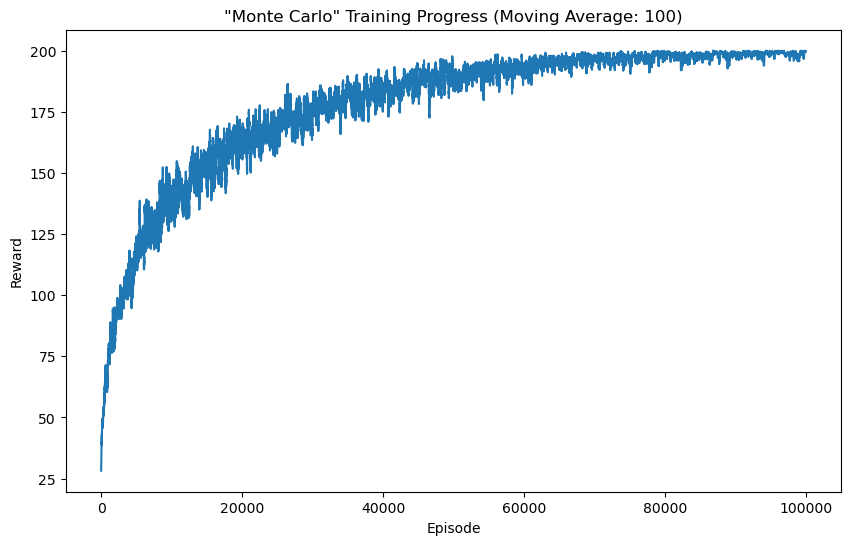

In [49]:
performance_logger.plot_training_progress(mcql_episode_rewards, '"Monte Carlo"', 100, f'{Config.direct}/{run_title}_monte_progress.png')

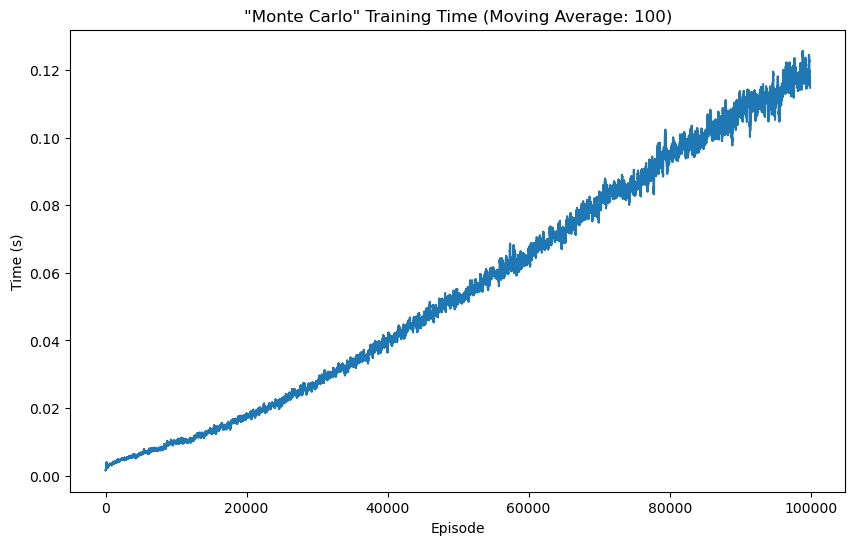

In [50]:
performance_logger.plot_time_progress(time_log, '"Monte Carlo"', 100, f'{Config.direct}/{run_title}_monte_time.png')

In [51]:
dims = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

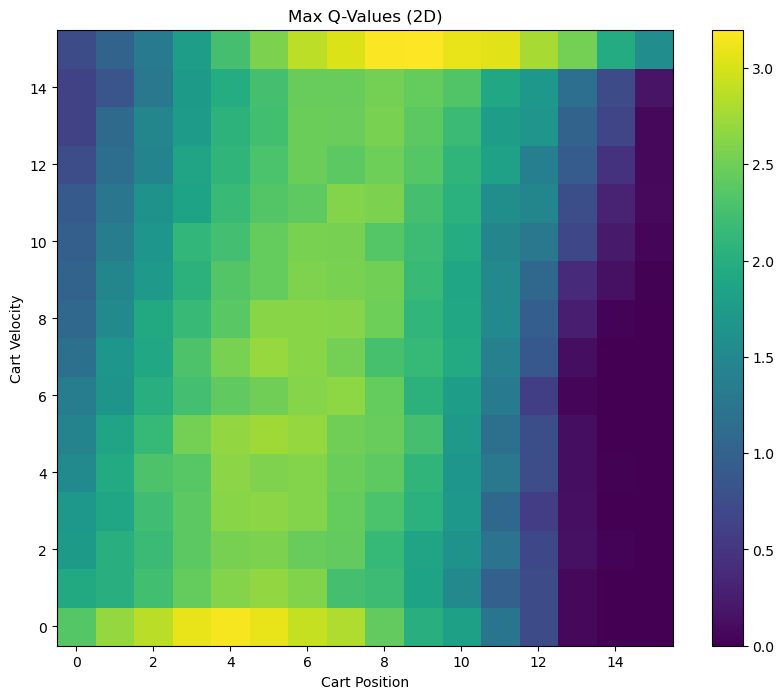

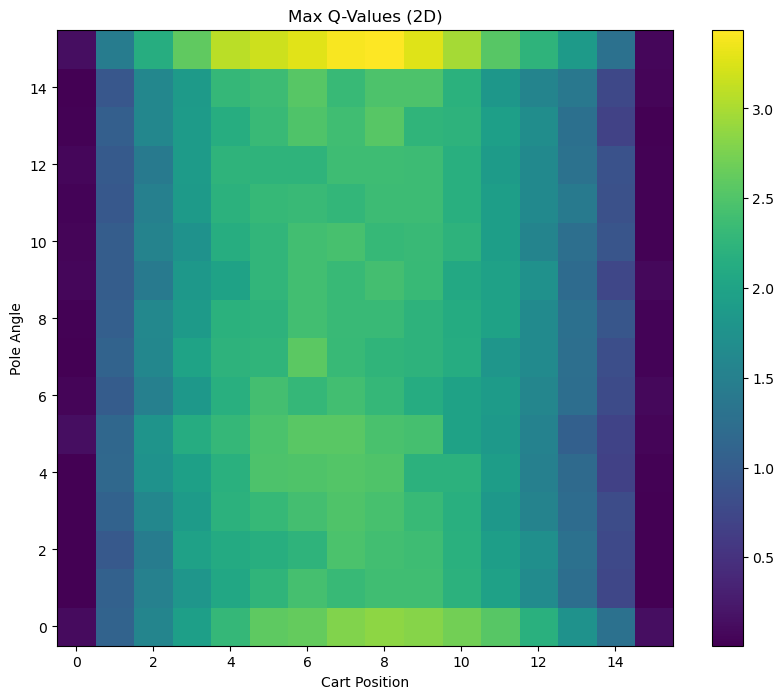

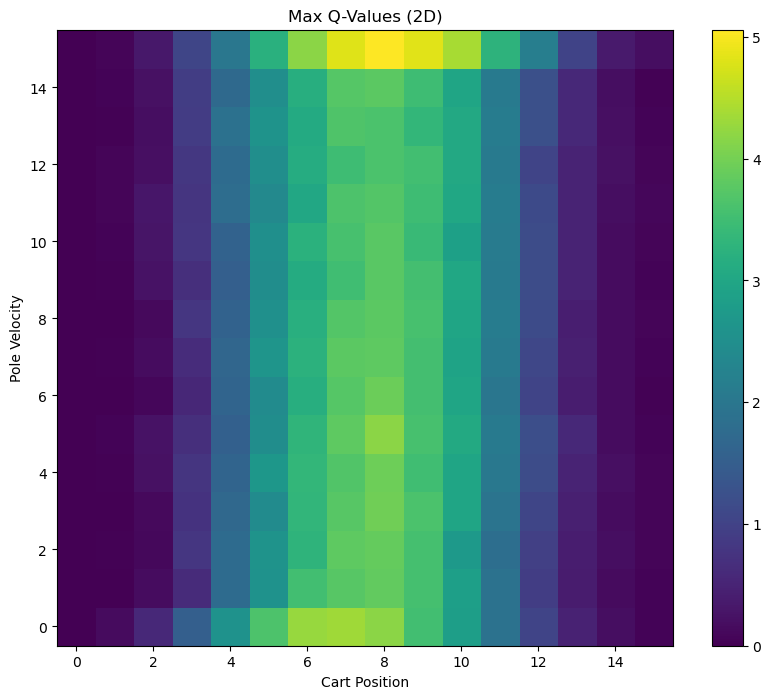

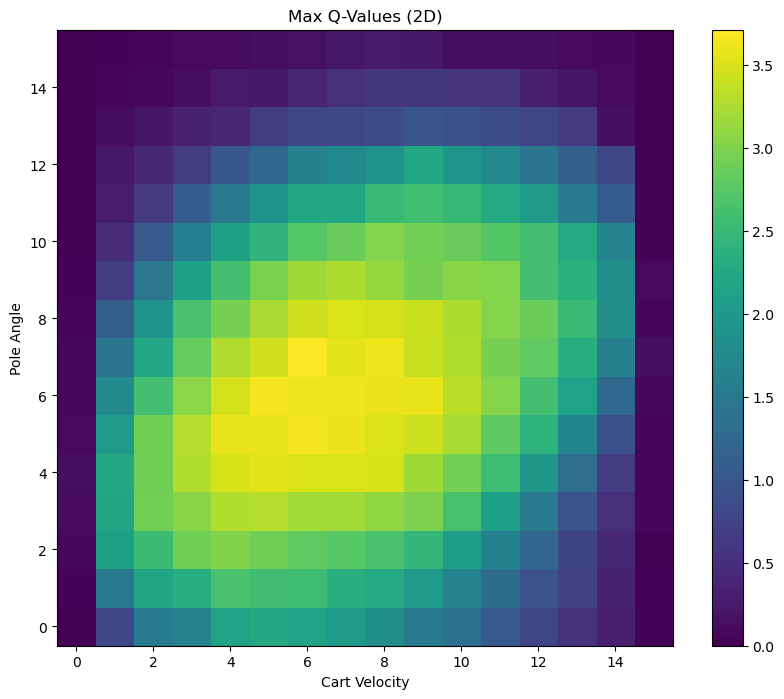

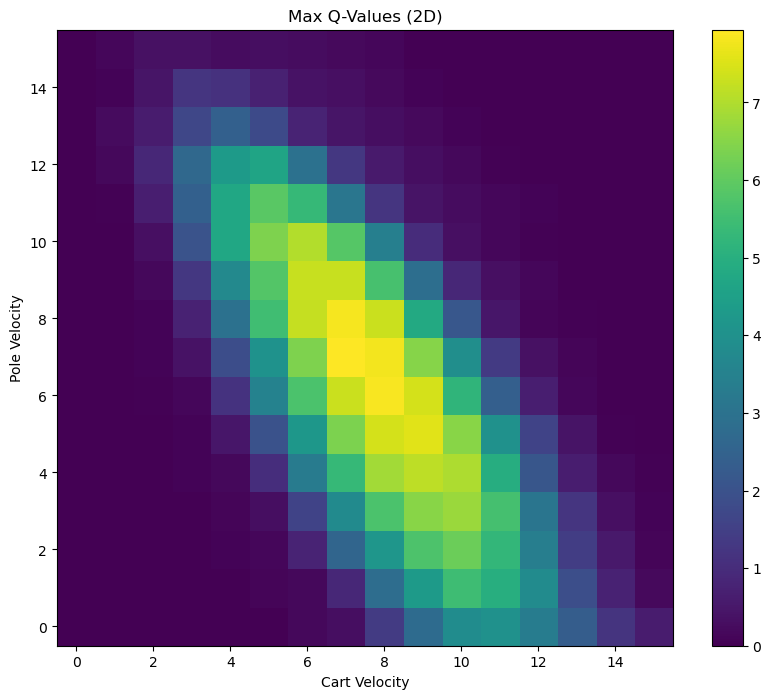

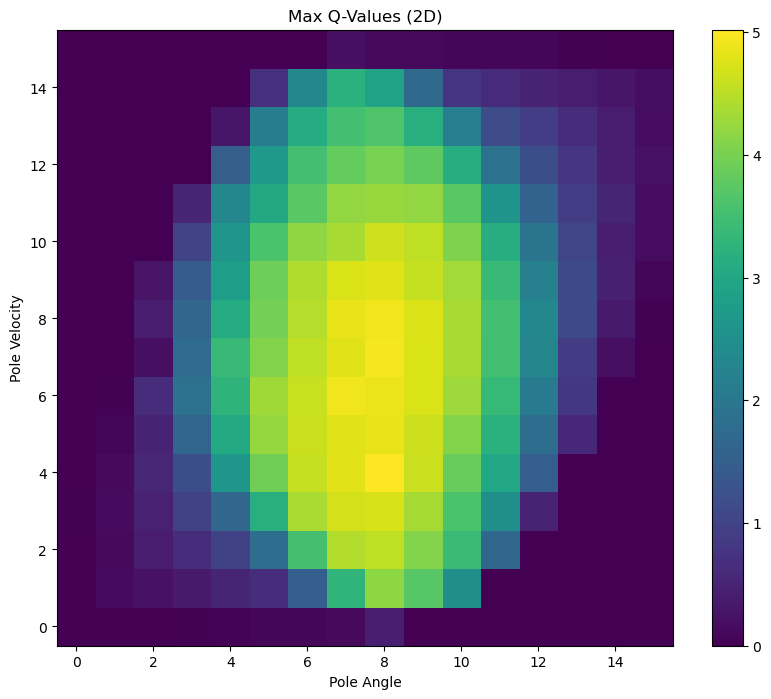

In [52]:
for dim1, dim2 in dims:
    performance_logger.visualize_q_values_2D(mcql.Q, dim1, dim2, f'{Config.direct}/{run_title}_monte_2D_values_{dim1}_{dim2}.png')

In [53]:
dims = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

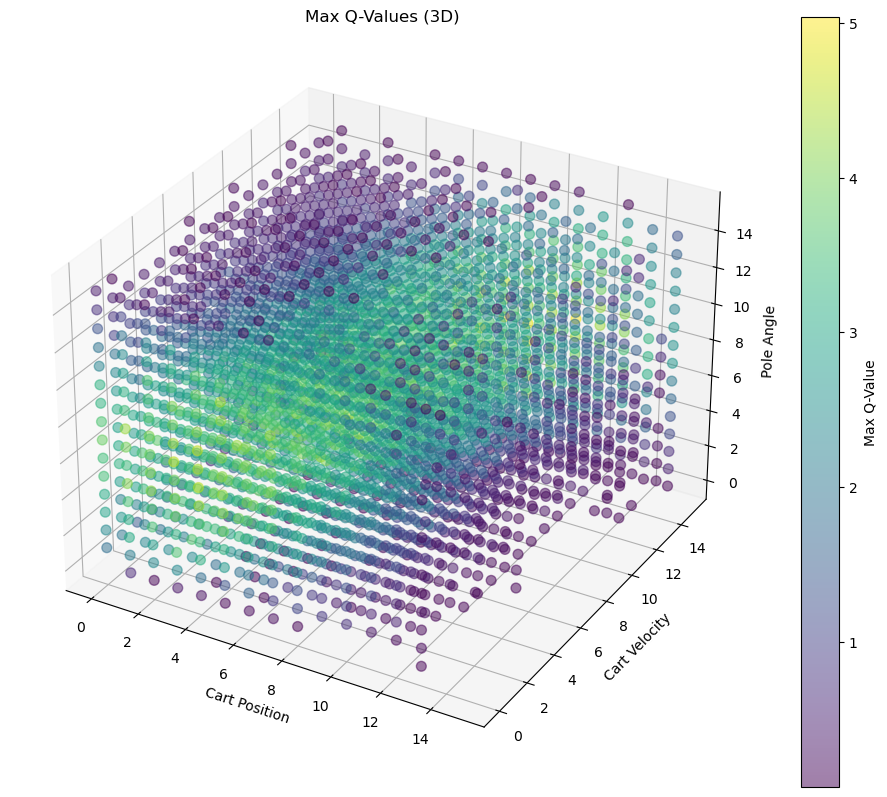

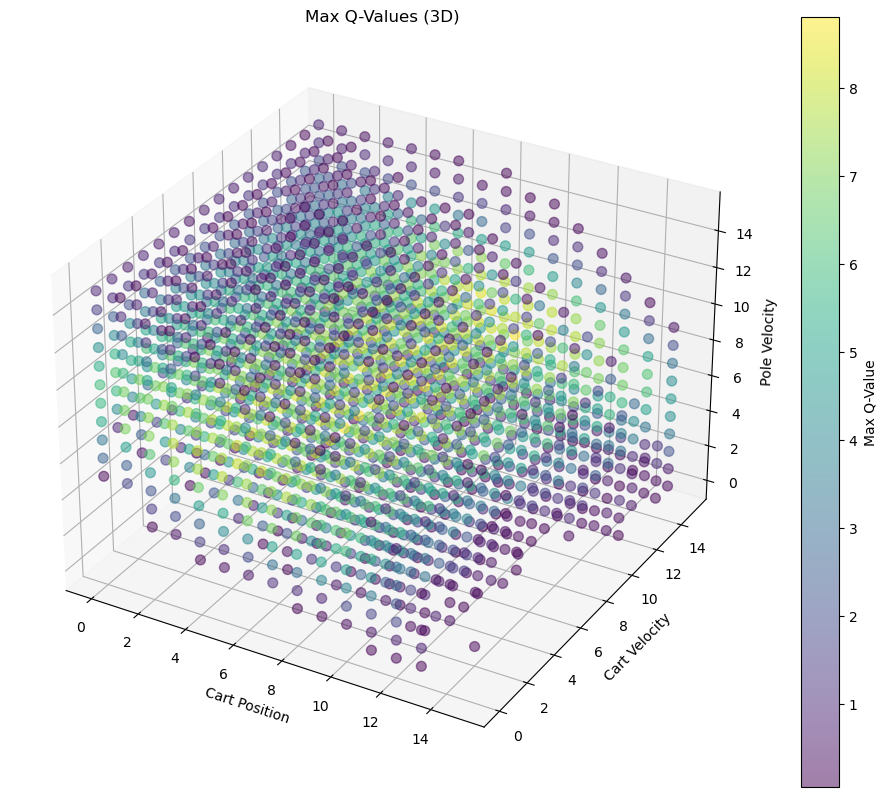

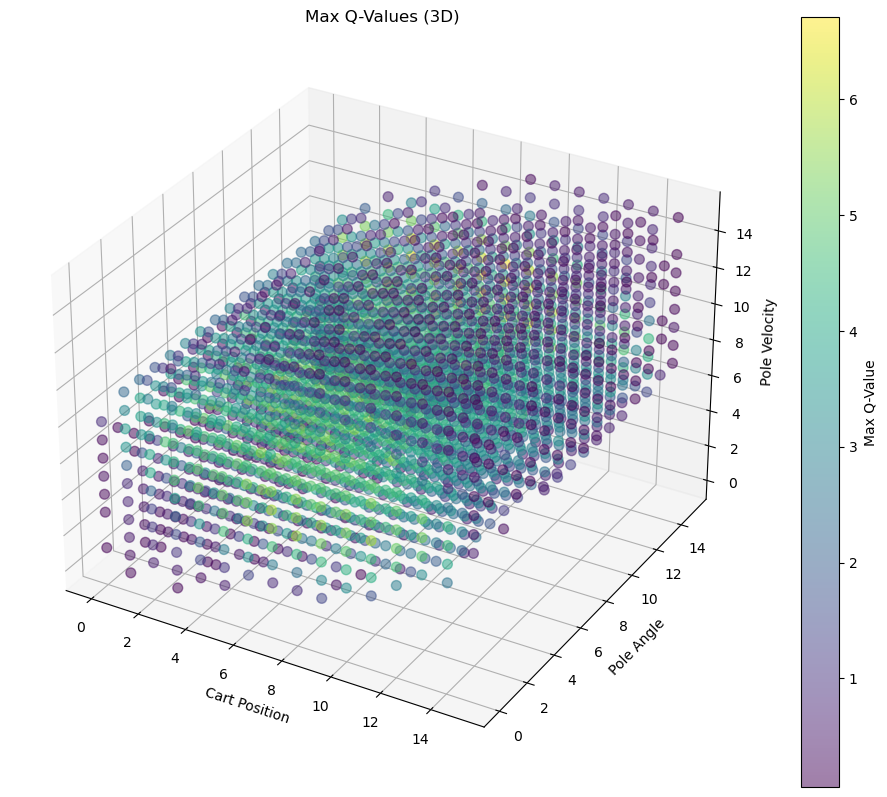

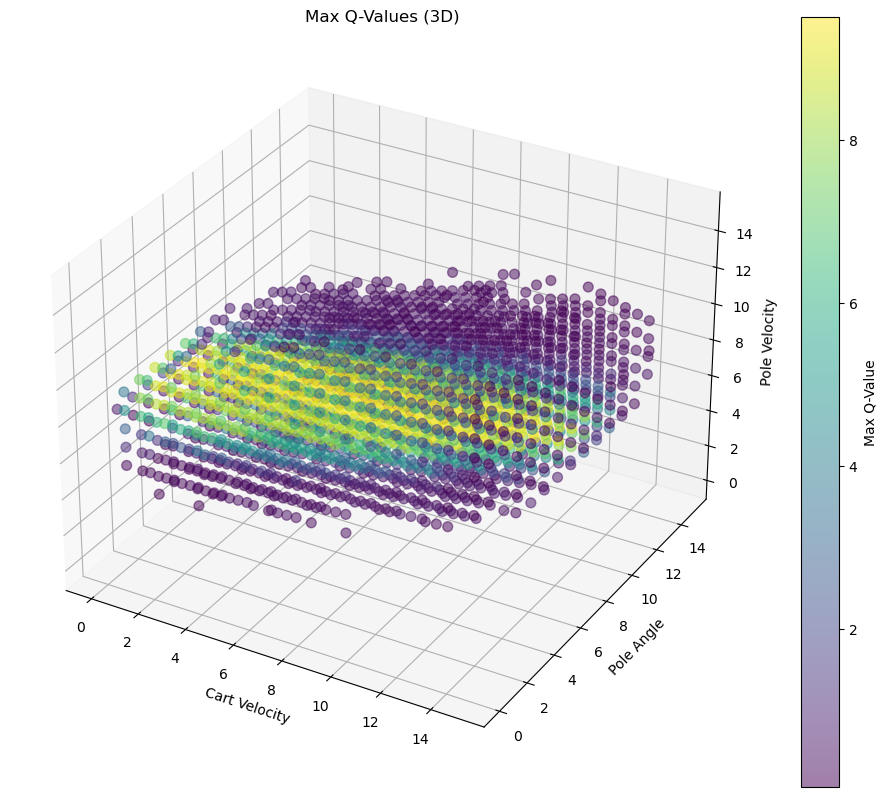

In [54]:
for dim1, dim2, dim3 in dims: 
    performance_logger.visualize_q_values_3D(mcql.Q, dim1, dim2, dim3, f'{Config.direct}/{run_title}_monte_3D_values_{dim1}_{dim2}_{dim3}.png')

## Log Data

Log data that would be relevent for report. 

In [55]:
performance_logger.LOG[f'{run_title}_monte_reward'] = reward_log
performance_logger.LOG[f'{run_title}_monte_time'] = time_log
performance_logger.LOG[f'{run_title}_monte_Q'] = mcql.Q

In [56]:
performance_logger.flush_LOG(f'{Config.direct}/LOG')